In [51]:
RAVIPATI BHANU CHANDU
700728966

SyntaxError: invalid syntax (Temp/ipykernel_21476/1242806497.py, line 1)

In [1]:
import pandas as pd #to read datasets
import seaborn as sns #to visualize
import matplotlib.pyplot as plt #to visualize

In [2]:
#evaluation imports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
dataset_folder = r"C://Users//tejac//OneDrive//Desktop//Dataset//"
dataset_folder 

'C://Users//tejac//OneDrive//Desktop//Dataset//'

In [18]:
titanic_train = pd.read_csv(dataset_folder+"train.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

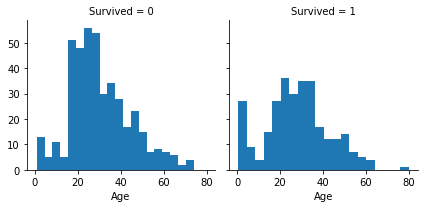

In [20]:
g = sns.FacetGrid(titanic_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\Users\tejac\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


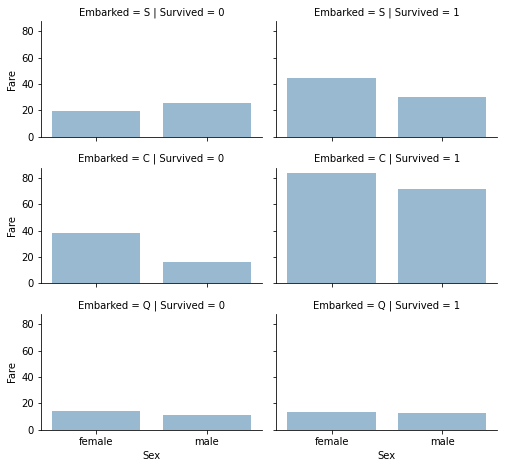

In [21]:
grid = sns.FacetGrid(titanic_train, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [22]:
#drop all unnecessary columns that doesnot help in modeling, seperate survived
X_train = titanic_train.drop(['Name', 'Ticket', 'Cabin','Parch','SibSp', 'PassengerId', 'Survived'], axis=1)
Y_train = titanic_train['Survived']
#X_train.head()

In [23]:
print(X_train.isnull().sum())

Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64


In [24]:
#fill missing values in age
meanAge = int(X_train.Age.dropna().mean())
X_train['Age'] = X_train['Age'].fillna(meanAge)

In [25]:
#fill missing values in embarked and map to numerical
#X_train['Embarked'].describe() to get common_value
common_value = 'S'

X_train['Embarked'] = X_train['Embarked'].fillna(common_value)

ports = {"S": 0, "C": 1, "Q": 2}

X_train['Embarked'] = X_train['Embarked'].map(ports)

In [26]:
#convert sex to numerical
X_train['Sex'] = X_train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [27]:
Y_train.corr(X_train['Sex'])#positive correlation


0.5433513806577552

In [28]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,3,0,35.0,8.0500,0


In [29]:
titanic_test = pd.read_csv(dataset_folder+"test.csv")
#titanic_test.describe()
X_test = titanic_test.drop(['Name', 'Ticket', 'Cabin','Parch','SibSp', 'PassengerId'], axis=1)
X_test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,34.5,7.8292,Q
1,3,female,47.0,7.0000,S
2,2,male,62.0,9.6875,Q
3,3,male,27.0,8.6625,S
4,3,female,22.0,12.2875,S


In [30]:
print(X_test.isnull().sum())

Pclass       0
Sex          0
Age         86
Fare         1
Embarked     0
dtype: int64


In [31]:
#fill missing values in age
X_test['Age'] = X_test['Age'].fillna(meanAge)#using mean from train set

In [32]:
#fill missing values in fare
X_test['Fare'] = X_test['Fare'].fillna(X_train['Fare'].dropna().median())#using median from train set

In [33]:
#map to numerical
ports = {"S": 0, "C": 1, "Q": 2}

X_test['Embarked'] = X_test['Embarked'].map(ports)

In [34]:
#convert sex to numerical
X_test['Sex'] = X_test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [35]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,34.5,7.8292,2
1,3,1,47.0,7.0000,0
2,2,0,62.0,9.6875,2
3,3,0,27.0,8.6625,0
4,3,1,22.0,12.2875,0


In [36]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_train, y_train_pred))
print(confusion_matrix(Y_train, y_train_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_train_pred,Y_train))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       549
           1       0.70      0.72      0.71       342

    accuracy                           0.78       891
   macro avg       0.76      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891

[[445 104]
 [ 95 247]]
accuracy is 0.77665544332211


In [37]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_train, y_train_pred))
print(confusion_matrix(Y_train, y_train_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_train_pred,Y_train))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       549
           1       0.64      0.48      0.55       342

    accuracy                           0.70       891
   macro avg       0.68      0.65      0.66       891
weighted avg       0.69      0.70      0.68       891

[[457  92]
 [179 163]]
accuracy is 0.6958473625140292


In [38]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, Y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_train, y_train_pred))
print(confusion_matrix(Y_train, y_train_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_train_pred,Y_train))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891

[[468  81]
 [109 233]]
accuracy is 0.7867564534231201


In [39]:
# Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(X_train, Y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_train, y_train_pred))
print(confusion_matrix(Y_train, y_train_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_train_pred,Y_train))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       549
           1       0.64      0.48      0.55       342

    accuracy                           0.70       891
   macro avg       0.68      0.66      0.66       891
weighted avg       0.69      0.70      0.69       891

[[455  94]
 [177 165]]
accuracy is 0.6958473625140292


In [40]:
glass = pd.read_csv(dataset_folder+"glass.csv")
#glass.head()
#glass.describe()

In [41]:
glass['Type'].value_counts()
#higly imbalanced dataset

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

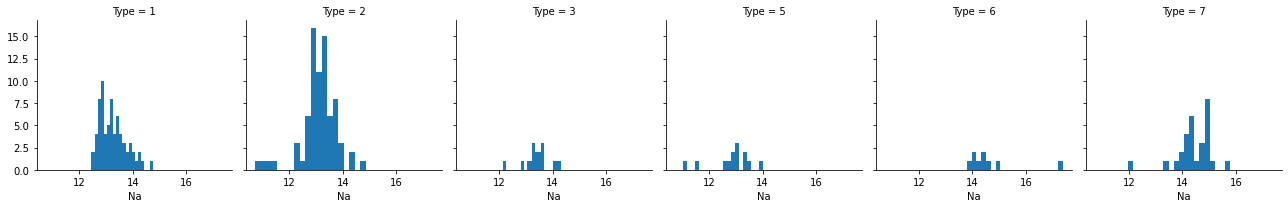

In [42]:
g = sns.FacetGrid(glass, col='Type')
g.map(plt.hist, 'Na', bins=20)

In [43]:
X = glass.iloc[:, :-1].values
Y = glass.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [44]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

y_test_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_test_pred))
print(confusion_matrix(Y_test, y_test_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_test_pred,Y_test))

              precision    recall  f1-score   support

           1       0.19      0.44      0.27         9
           2       0.33      0.16      0.21        19
           3       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.37        43
   macro avg       0.42      0.47      0.42        43
weighted avg       0.40      0.37      0.36        43

[[ 4  3  1  0  1  0]
 [14  3  1  1  0  0]
 [ 3  1  1  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.37209302325581395


In [45]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

y_test_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_test_pred))
print(confusion_matrix(Y_test, y_test_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_test_pred,Y_test))

              precision    recall  f1-score   support

           1       0.28      0.89      0.42         9
           2       0.40      0.11      0.17        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.67      1.00      0.80         6

    accuracy                           0.37        43
   macro avg       0.22      0.33      0.23        43
weighted avg       0.33      0.37      0.27        43

[[ 8  1  0  0  0  0]
 [16  2  0  0  0  1]
 [ 5  0  0  0  0  0]
 [ 0  0  0  0  0  2]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.37209302325581395


C:\Users\tejac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tejac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tejac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, Y_train)

y_test_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_test_pred))
print(confusion_matrix(Y_test, y_test_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_test_pred,Y_test))

              precision    recall  f1-score   support

           1       0.27      0.89      0.41         9
           2       0.29      0.11      0.15        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.83      0.83      0.83         6

    accuracy                           0.35        43
   macro avg       0.23      0.30      0.23        43
weighted avg       0.30      0.35      0.27        43

[[ 8  1  0  0  0  0]
 [16  2  0  0  0  1]
 [ 5  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 1  0  0  0  0  5]]
accuracy is 0.3488372093023256


C:\Users\tejac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tejac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tejac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(X_train, Y_train)

y_test_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_test_pred))
print(confusion_matrix(Y_test, y_test_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_test_pred,Y_test))

              precision    recall  f1-score   support

           1       0.28      1.00      0.44         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         2
           6       0.50      0.50      0.50         2
           7       0.75      1.00      0.86         6

    accuracy                           0.40        43
   macro avg       0.42      0.50      0.41        43
weighted avg       0.23      0.40      0.27        43

[[ 9  0  0  0  0  0]
 [17  0  0  0  1  1]
 [ 5  0  0  0  0  0]
 [ 0  0  0  1  0  1]
 [ 1  0  0  0  1  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.3953488372093023


C:\Users\tejac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tejac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tejac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.svm import SVC, LinearSVC

In [49]:
svc = SVC(max_iter=1000)

svc.fit(X_train, Y_train)

y_test_pred = svc.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_test_pred))
print(confusion_matrix(Y_test, y_test_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_test_pred,Y_test))

              precision    recall  f1-score   support

           1       0.21      1.00      0.35         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.21        43
   macro avg       0.03      0.17      0.06        43
weighted avg       0.04      0.21      0.07        43

[[ 9  0  0  0  0  0]
 [19  0  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 6  0  0  0  0  0]]
accuracy is 0.20930232558139536


C:\Users\tejac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tejac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tejac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
svc = LinearSVC(max_iter=5000)

svc.fit(X_train, Y_train)

y_test_pred = svc.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_test_pred))
print(confusion_matrix(Y_test, y_test_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_test_pred,Y_test))

              precision    recall  f1-score   support

           1       0.22      0.22      0.22         9
           2       0.53      0.47      0.50        19
           3       0.40      0.40      0.40         5
           5       0.50      0.50      0.50         2
           6       1.00      0.50      0.67         2
           7       0.67      1.00      0.80         6

    accuracy                           0.49        43
   macro avg       0.55      0.52      0.51        43
weighted avg       0.49      0.49      0.48        43

[[2 5 2 0 0 0]
 [7 9 1 1 0 1]
 [0 3 2 0 0 0]
 [0 0 0 1 0 1]
 [0 0 0 0 1 1]
 [0 0 0 0 0 6]]
accuracy is 0.4883720930232558


C:\Users\tejac\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
